## Data sources are
https://ourworldindata.org/coronavirus
https://ourworldindata.org/coronavirus#coronavirus-country-profiles 
(https://www.rki.de/EN/Content/infections/epidemiology/inf_dis_Germany/COVID-19/Situationsberichte_Tab.html).
https://www.moph.gov.af/en
https://health-infobase.canada.ca/covid-19/
 For real data, you can refer to official sources from the Algerian Ministry of Health (https://ghdx.healthdata.org/organizations/ministry-health-population-and-hospital-reform-algeria) or the World Health Organization https://www.who.int/emergencies/diseases/novel-coronavirus-2019/advice-for-public).
http://www.emro.who.int/images/stories/coronavirus/covid-sitrep-28.pdf
https://ourworldindata.org/coronavirus-testing 
https://ourworldindata.org/grapher/cumulative-covid-vaccinations-income-group?country=~DEU



 *Analysised and dash implemented by Bratati Chakrabori Guided by Professor Axel*

 # This Python code creates a world map visualization using Cartopy to highlight countries affected based on CSV data. 

It reads country data, filters affected countries from your DataFrame, colors them red on the map, and displays the map with coastlines and a title.

* 1. Import Libraries:

pandas (pd): Used for data manipulation tasks like reading CSV files and accessing data by column names.
matplotlib.pyplot (plt): Used for creating the basic plot structure for the map.
from cartopy.io import shapereader: Imports the shapereader function from Cartopy for reading country shapefile data.
from cartopy import crs: Imports coordinate reference system (CRS) functionalities from Cartopy for map projections.
* 2. Read CSV Data:
data = pd.read_csv("./affected_country.csv"): Reads the CSV file located at "./affected_country.csv" and stores the data in a pandas DataFrame named data.
* 3. Filter Affected Countries:

affected_countries = data["country"].unique(): Extracts a list of unique countries with affected cases from the "country" column in the DataFrame data.
* 4. Create the Figure and Map Axes:

plt.figure(figsize=(16, 6)): Creates a new figure window for the plot with a width of 16 inches and a height of 6 inches, providing a larger canvas for the map.
ax = plt.axes(projection=crs.PlateCarree()): Creates a map axes using the Plate Carree projection, which is commonly used for world maps.
* 5. Download and Load Country Data (High Resolution):

shpfile = shapereader.natural_earth(resolution='110m', category='cultural', name='admin_0_countries'): Downloads high-resolution country data (110 meters) from the Natural Earth database using Cartopy's shapereader. The cultural category ensures you get country borders (administrative boundaries).
reader = shapereader.Reader(shpfile): Creates a reader object to access the downloaded country data.
countries = reader.records(): Reads the country data from the shapefile and stores it in a list of country records.
* 6. Highlight Affected Countries:

for country in countries: Iterates over each country record in the countries list.
country_name = country.attributes['NAME']: Extracts the full country name from the record's attributes dictionary using the key "NAME" (replace "ADM0_A3" if your data uses a 3-letter country code).
if country_name in affected_countries: Checks if the current country name is present in the list of affected_countries.
ax.add_geometries(country.geometry, crs.PlateCarree(), facecolor='red', edgecolor='k'): If the country is affected, adds its geometry (borders) to the map axes with a red face color and black edge color.
else: If the country is not affected, adds its geometry with a white face color and black edge color.
* 7. Add Map Elements:

ax.coastlines(color='black', linewidth=0.6): Adds coastlines to the map with a black color and a line width of 0.6 for better visualization.
* 8. Display the Plot:
plt.title("World Map of Affected Countries"): Sets a title for the plot, indicating the map's purpose.
plt.show(): Displays the created world map.

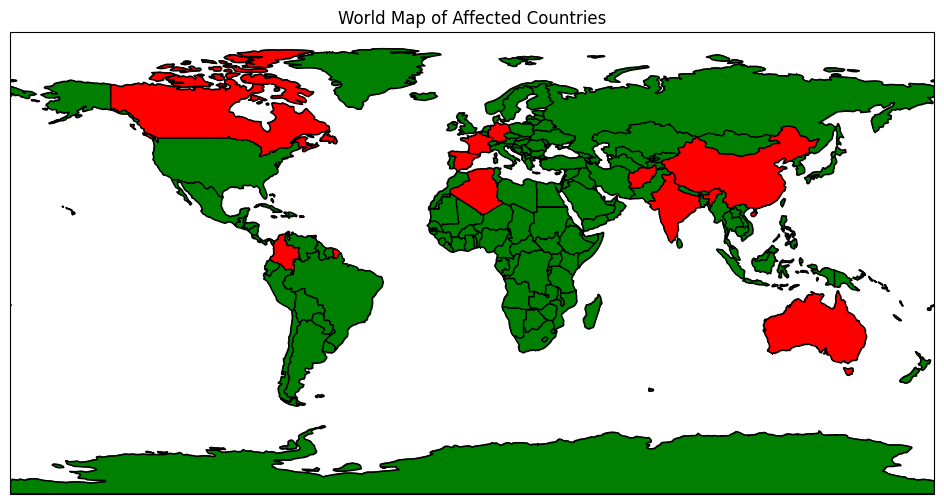

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from cartopy.io import shapereader
from cartopy import crs

# Read the CSV data
data = pd.read_csv("./affected_country.csv")

# Filter for unique countries with affected cases
affected_countries = data["country"].unique()

# Create a figure with a specific size
plt.figure(figsize=(16, 6))
ax = plt.axes(projection=crs.PlateCarree())

# Download and load country data (high resolution)
shpfile = shapereader.natural_earth(resolution='110m', category='cultural', name='admin_0_countries')
reader = shapereader.Reader(shpfile)
countries = reader.records()

# Highlight affected countries in red
for country in countries:
    country_name = country.attributes['NAME']  # Use 'NAME' instead of 'ADM0_A3' for full country names
    if country_name in affected_countries:
        ax.add_geometries(country.geometry, crs.PlateCarree(), facecolor='red', edgecolor='k')
    else:
        ax.add_geometries(country.geometry, crs.PlateCarree(), facecolor='green', edgecolor='k')

# Add additional map elements
ax.coastlines(color='black', linewidth=0.6)  # Add coastlines

# Display the plot
plt.title("World Map of Affected Countries")
plt.show()


# Documentation for Interactive interactive  Dash to visualize **vaccination rates across different age groups for various countries and years.**

_vacccination_by_age is analysised and dash implemented by Bratati Chakrabori   Guided by Professor Axel_

This Python code creates an interactive dashboard using Dash to visualize vaccination rates (people vaccinated per hundred) across different age groups for various countries and years. Here's a detailed breakdown of the code and its functionalities:

## 1. Libraries:**

* pandas (pd): Used for data analysis tasks like reading CSV files and manipulating DataFrames.
* matplotlib.pyplot (plt) (not used directly): Imported for potential future plotting needs within Dash (commented out).
* io.BytesIO: Used to convert Plotly figures into byte streams for embedding images in Dash.
* base64: Encodes the image data for efficient transmission within Dash.
* Dash: Core library for building web-based interactive dashboards.
* dcc: Submodule for creating interactive components like dropdown menus and graphs.
* html: Submodule for defining the HTML layout structure of the dashboard.
**Input: Decorator for specifying inputs to Dash callback functions (user interactions).
Output: Decorator for specifying outputs from Dash callback functions (updating dashboard elements).
plotly.express (px): High-level API for creating expressive charts used for the interactive visualization in this case.

## 2. Data Loading and Cleaning (if needed):

The code reads a CSV file assumed to be named vaccinations-by-age-group.csv (replace with your actual filename) using pd.read_csv.
It expects the CSV to contain columns like:
date: Date of vaccination (format: 'DD/MM/YYYY')
location: Country where vaccination occurred
age_group: Age group of the vaccinated population
people_vaccinated_per_hundred: Vaccination rate (per hundred people)
people_fully_vaccinated_per_hundred: Full vaccination rate (per hundred)
people_with_booster_per_hundred: Booster shot rate (per hundred)
The code checks if a date column exists. If it does, it converts the date column to datetime format assuming 'DD/MM/YYYY' format using pd.to_datetime. Then, it extracts the year from the datetime column and creates a new year column for easier filtering later.
## 3. Visualization Function (create_visualization):

This function takes selected_year and selected_country as input, obtained from user interactions with the dashboard's dropdown menus.
It filters the DataFrame (df) to include data for the selected year (filtered_df).
If selected_country is provided (not None), it further filters filtered_df to include data for that specific country.
It creates a bar chart using px.bar from plotly.express:
X-axis: Represents the age_group.
Y-axis: Three separate bars are stacked for each age group, representing:
People vaccinated per hundred
People fully vaccinated per hundred
People with booster shots per hundred
barmode="group" stacks the bars to show cumulative vaccination rates.
The chart title dynamically updates based on the selected year and country (or "All Countries" if no country is chosen).
The function enhances readability by adding black borders and a width of 1 pixel to each bar marker using layout updates.
To display the chart in Dash, the function converts the Plotly figure into a PNG image using fig.write_image and stores it in a byte stream.
Finally, it encodes the image data using base64 for efficient transmission within Dash and returns the encoded data as a string.
## 4. Dash App Initialization:

A Dash app instance (app) is created using Dash(__name__).
Enabling debugging mode (debug=True) allows for automatic browser reload during development, making it easier to see changes reflected in the dashboard.
## 5. App Layout:

The layout structure is defined using html.Div containers.
A heading ("Vaccination Rates by Country and Age Group") is displayed.
A row containing two dropdown menus is created:
year-dropdown: This dropdown allows users to select a year from available options in the dataset. The code pre-selects the latest year by default.
country-dropdown: This dropdown allows users to optionally filter by country. Users can choose from unique countries present in the dataset.
##6. Callback Function (update_graph):
This function, decorated with @app.callback, is responsible for updating the graph container based on user interactions with the dropdown menus. It essentially reacts to changes in user selections and updates the visualization accordingly.
**The callback takes two arguments as input:**
selected_year: This represents the year chosen by the user from the year dropdown menu.
selected_country: This represents the country chosen by the user from the country dropdown menu (or None if no country is selected).
**Output** :The callback utilizes the Output decorator to specify the output of the function. In this case, the output is the content of the graph-container element within the app layout.
The function calls the previously defined create_visualization function, passing the selected_year and selected_country as arguments. This retrieves the updated visualization based on the user's selections.
The function then returns an html.Img element with the src attribute set to the encoded image data generated by create_visualization. This effectively displays the updated chart within the graph-container on the dashboard.




In [1]:
# Install required libraries (assuming you haven't already)
!pip install -U kaleido dash pandas seaborn

In [3]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from io import BytesIO
import base64
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

# Read data from your CSV file (replace 'vaccinations-by-age-group.csv' with the actual path)
df = pd.read_csv('vaccinations-by-age-group.csv')  # Assuming CSV is in the same directory

# Data cleaning and transformation (if needed)
# Assuming dates are in 'DD/MM/YYYY' format, convert to datetime
if 'date' in df.columns:  # Check if 'date' column exists
    df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
    # Extract year
    df['year'] = df['date'].dt.year

# Define visualization function (using Plotly Express)
def create_visualization(selected_year, selected_country):
    filtered_df = df[df['year'] == selected_year]
    if selected_country:
        filtered_df = filtered_df[df['location'] == selected_country]

    fig = px.bar(
        filtered_df,
        x="age_group",
        y=["people_vaccinated_per_hundred", "people_fully_vaccinated_per_hundred", "people_with_booster_per_hundred"],
        barmode="group",  # Stack bars to show cumulative values
        title=f"Vaccination Rates in {selected_country or 'All Countries'} ({selected_year})"
    )
    fig.update_layout(legend_title_text="Vaccination Status")
    fig.update_traces(marker_line_color='black', marker_line_width=1)  # Improve bar visibility

    # Convert plot to PNG for Dash usage
    img_bytes = BytesIO()
    fig.write_image(img_bytes, format='png')
    img_bytes.seek(0)
    encoded_img = base64.b64encode(img_bytes.getvalue()).decode('utf-8')

    return f'data:image/png;base64,{encoded_img}'

# Initialize Dash app
app = Dash(__name__)

# App layout
app.layout = html.Div([
    html.H1("Vaccination Rates by Country and Age Group"),
    html.Div([
        dcc.Dropdown(
            id="year-dropdown",
            options=[{'label': str(y), 'value': y} for y in df['year'].unique()],
            value=df['year'].max()  # Pre-select the latest year
        ),
        dcc.Dropdown(
            id="country-dropdown",
            options=[
                {'label': c, 'value': c} for c in df['location'].unique()] # + [{'label': 'All Countries', 'value': None}],  # Allow filtering by all countries
            #value=None
        )
    ]),
    html.Div(id='graph-container'),
])

# Callback to update the graph
@app.callback(
    Output(component_id='graph-container', component_property='children'),
    [Input(component_id='year-dropdown', component_property='value'),
     Input(component_id='country-dropdown', component_property='value')]
)
def update_graph(selected_year, selected_country):
    graph_image = create_visualization(selected_year, selected_country)
    return html.Img(src=graph_image)

if __name__ == '__main__':
    app.run_server(debug=True,port=8092)

C:\Users\admin\AppData\Local\Temp\ipykernel_3288\1922049611.py:23: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



# **Interactive COVID-19 Affected Country (Positive case )Visualization with Dash**


**This document provides  for an interactive dashboard application that visualizes data on COVID-19 affected countries.**
_This data is analysed and coded by Bratati Chakraborti
Guidede by Professor Axel_

**Interactive Visualization of Affected Countries by Year**

This script utilizes Dash and Plotly Express to create an interactive dashboard that allows users to explore the percentage of affected individuals in different countries across years.

This Dash application visualizes data on countries affected by a phenomenon (here "affected" mean potive case) . Users can explore the data by selecting a year using the slider component.

**Key Functionalities:**
    Data Import:
Reads data from a CSV file named affected_country.csv located in the same directory as  Python script.
CSV file contains columns year, month, percent_affected, affected (number of people/areas affected), continent, and country.
Interactive Exploration:
Presents a scatter plot with the following features:
X-axis: Month
Y-axis: Percentage Affected
Size: Number Affected 
Color: Continent
Hover Text: Country name
Logarithmic X-axis for better visualization of large variations.
Users can dynamically filter the data by selecting a year using the slider component.
The slider displays the minimum and maximum years present in the data.
Each year on the slider corresponds to a unique marker in the plot.
* **Smooth Transitions:**
Employs a transition duration of 500 milliseconds for smooth updates to the plot when the slider value changes, enhancing user experience.
Code Structure:

**Details descriptions of Libraries:**

1. **Dash:** A framework for building web-based analytical dashboards in Python.
dcc: Dash Core Components, offering interactive UI elements like graphs, sliders, and dropdowns.
2. **html:** Dash HTML Components, for creating the basic layout of the dashboard.
3. **Input:** Dash Input decorator, used to capture user interaction with UI elements.
4. **Output:** Dash Output decorator, used to specify the output of callback functions.
5. **callback:** Dash callback decorator, defining functions that update the app based on user interactions.
**plotly.express:** A library for creating expressive visualizations in Python.
pandas (not used directly in the provided code snippet): A library for data analysis and manipulation (potentially used to read CSV data or prepare the data beforehand).
Code Explanation:


**Data Loading:**

Reads the CSV file into a pandas DataFrame (df).
Prints summary information about the DataFrame using df.info().
Dash Application Initialization:

Creates a Dash app instance (app) using Dash(__name__).
Sets debug=True for automatic browser reload during development.
Sets port=8055 to customize the port on which the app runs (optional).
Layout Definition:

**Graph Component:**
dcc.Graph(id='graph-with-slider'): This line creates a scatter plot component with the ID graph-with-slider. This component will be used to display the visualization.
Slider Component:
dcc.Slider(...): This creates a slider component with the ID year-slider. The slider is configured with the following properties:
Leverages data to set minimum (df['year'].min()) and maximum (df['year'].max()) values.
step=None: Disables step increments on the slider, allowing for smooth continuous selection.
Sets the initial value (value=df['year'].min()) to the minimum year.
Creates year labels on the slider track using a dictionary comprehension (marks argument). 

Creates an html.Div container to hold all layout elements.
Integrates a dcc.Graph component with the ID 'graph-with-slider' for displaying the scatter plot.
Adds a dcc.Slider component with the ID 'year-slider':
Sets min and max values based on the year column in df.
Sets step=None for continuous sliding without discrete steps.
Sets value to the minimum year initially.
Creates a dictionary marks to display year labels on the slider.

   **Callback function**

@callback(...): This line defines a callback function named update_figure using the @callback decorator.
* **Output('graph-with-slider', 'figure'): This specifies that the callback function updates the figure property of the component with ID graph-with-slider.
* **Input('year-slider', 'value'): This indicates that the callback function will be triggered whenever the value property of the component with ID year-slider changes (i.e., when the user interacts with the slider).**
def update_figure(selected_year):: This defines the callback function that takes the selected year value (selected_year) from the slider as input.
 the absolute number of affected individuals or cases.
color="continent": Uses the continent column to color the data points, allowing for visual differentiation by continent.
hover_name="country": Sets the hover name for each data point to the country column, providing additional information on mouse hover.
log_x=True: 
Applies a logarithmic scale to the x-axis (month), potentially useful for handling



In [2]:
from dash import Dash, dcc, html, Input, Output, callback
import plotly.express as px
import pandas as pd

# Load data
df = pd.read_csv('./affected_country.csv')

# Ensure the 'year' column is of integer type and handle NaN values
df['year'] = df['year'].dropna().astype(int)

app = Dash(__name__)

app.layout = html.Div([
    dcc.Graph(id='graph-with-slider'),
    dcc.Slider(
        min=df['year'].min(),
        max=df['year'].max(),
        step=None,
        value=df['year'].min(),
        marks={str(year): str(year) for year in df['year'].unique()},
        id='year-slider'
    )
])

@app.callback(
    Output('graph-with-slider', 'figure'),
    Input('year-slider', 'value'))
def update_figure(selected_year):
    filtered_df = df[df['year'] == selected_year]

    fig = px.scatter(filtered_df, x="month", y="percent_affected",
                     size="affected", color="continent", hover_name="country",
                     log_x=True, size_max=55)

    fig.update_layout(transition_duration=500)

    return fig

if __name__ == '__main__':
    app.run_server(debug=True, port=8055)


In [2]:
from dash import Dash, dcc, html, Input, Output, callback
import plotly.express as px

import pandas as pd

df = pd.read_csv('./affected_country.csv')

app = Dash(__name__)
print(df.info())

app.layout = html.Div([
    dcc.Graph(id='graph-with-slider'),
    dcc.Slider(
        df['year'].min(),
        df['year'].max(),
        step=None,
        value=df['year'].min(),
        marks={str(year): str(year) for year in df['year'].unique()},
        id='year-slider'
    )
])


@callback(
    Output('graph-with-slider', 'figure'),
    Input('year-slider', 'value'))
def update_figure(selected_year):
    filtered_df = df[df.year == selected_year]

    fig = px.scatter(filtered_df, x="month", y="percent_affected",
                     size="affected", color="continent", hover_name="country",
                     log_x=True, size_max=55)

    fig.update_layout(transition_duration=500)

    return fig


if __name__ == '__main__':
    app.run(debug=True,port=8055)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           304 non-null    object 
 1   year              303 non-null    float64
 2   affected          303 non-null    float64
 3   continent         303 non-null    object 
 4   percent_affected  303 non-null    float64
 5   month             303 non-null    float64
dtypes: float64(4), object(2)
memory usage: 14.5+ KB
None


# **Interactive Vaccine Comparison Dashboard**

This code creates an **interactive dashboard using Dash to compare vaccination data across different vaccines and years(2020-2024)**. 

_code is wriiten by  Bratati Chakraborti
Aggregated data saved to aggregated_vaccine_data.csv. 

_Guided by Professor Axel Wemmel

Users can select vaccines for the X and Y axes, choose between linear or logarithmic scales, and filter data by year using a slider. Hovering over data points on the scatter plot reveals the corresponding country name and updates time series graphs on the right side for the selected country.

**Data Requirements

The code assumes a CSV file named aggregated_vaccine_data.csv containing data on vaccinations, with columns like:

Country Name: Name of the country
Year: Year of vaccination data
Vaccine: Name of the vaccine (e.g., Covaxin, Covishield)
Vaccinated: Number of people vaccinated
Code Breakdown

## Imports:

Necessary libraries for the dashboard: dash for building the layout, pandas for data manipulation, plotly.express for visualizations.
External stylesheet for improved layout (external_stylesheets).
App Initialization:

Creates a Dash app instance (app).
Loads the CSV data into a pandas DataFrame (df).
## Layout:

The app.layout defines the visual structure of the dashboard using HTML components.
The layout comprises several sections:
Dropdown Menus: Two dropdown menus allow selecting vaccines for the X and Y axes (crossfilter-xaxis-column and crossfilter-yaxis-column).
Radio Items: Users can choose between linear or logarithmic scales for both axes (crossfilter-xaxis-type and crossfilter-yaxis-type).
Scatter Plot: The main visualization (crossfilter-indicator-scatter) displays the selected vaccines on a scatter plot. Hovering over data points reveals the country name.
Time Series Plots: Two smaller graphs (x-time-series and y-time-series) show time series data for the selected country and chosen vaccine from the scatter plot.
Year Slider: A slider (crossfilter-year--slider) allows filtering data by year.
update_graph Callback:

This callback function updates the scatter plot (crossfilter-indicator-scatter) based on user selections.
 **Input It takes inputs from the dropdown menus, radio items, and year slider.
It filters the data based on selected vaccines and year.
If no data is available for the selection, it displays a message.
Otherwise, it creates a scatter plot using px.scatter from plotly.express.
Hover data is set to display the country name.**
Axis titles and scales are set based on user selections.
Layout options like margins and hover mode are adjusted.
create_time_series Function:

This helper function creates time series graphs for a particular country and vaccine.
It takes a filtered DataFrame (dff), axis type (axis_type), and title (title) as input.
It uses px.scatter to create a line chart with markers.
It sets grid visibility, axis type, and adds an annotation for the title.
Layout options are adjusted for height and margins.
update_x_timeseries and update_y_timeseries Callbacks:

These callbacks handle updating the time series graphs on hover interaction with the scatter plot.
They take hover data (hoverData), selected vaccine for the respective axis (xaxis_column_name or yaxis_column_name), and axis type (axis_type) as input.
They extract the country name from the hover data and filter the DataFrame accordingly.
**output: They call the create_time_series function to generate the time series plot with the appropriate title.
Main Execution:**

The if __name__ == '__main__' block ensures the code runs only when executed directly (not imported as a module).

In [3]:
from dash import Dash, html, dcc, Input, Output, callback
import pandas as pd
import plotly.express as px

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = Dash(__name__, external_stylesheets=external_stylesheets)

df = pd.read_csv('./aggregated_vaccine_data.csv')


app.layout = html.Div([
    html.Div([

        html.Div([
            dcc.Dropdown(
                df['Vaccine'].unique(),
                'Covaxin',
                id='crossfilter-xaxis-column',
            ),
            dcc.RadioItems(
                ['Linear', 'Log'],
                'Linear',
                id='crossfilter-xaxis-type',
                labelStyle={'display': 'inline-block', 'marginTop': '5px'}
            )
        ],
        style={'width': '49%', 'display': 'inline-block'}),

        html.Div([
            dcc.Dropdown(
                df['Vaccine'].unique(),
                'Covishield',
                id='crossfilter-yaxis-column'
            ),
            dcc.RadioItems(
                ['Linear', 'Log'],
                'Linear',
                id='crossfilter-yaxis-type',
                labelStyle={'display': 'inline-block', 'marginTop': '5px'}
            )
        ], style={'width': '49%', 'float': 'right', 'display': 'inline-block'})
    ], style={
        'padding': '10px 5px'
    }),

    html.Div([
        dcc.Graph(
            id='crossfilter-indicator-scatter',
            hoverData={'points': [{'customdata': 'India'}]}
        )
    ], style={'width': '49%', 'display': 'inline-block', 'padding': '0 20'}),
    html.Div([
        dcc.Graph(id='x-time-series'),
        dcc.Graph(id='y-time-series'),
    ], style={'display': 'inline-block', 'width': '49%'}),

    html.Div(dcc.Slider(
        df['Year'].min(),
        df['Year'].max(),
        step=None,
        id='crossfilter-year--slider',
        value=df['Year'].max(),
        marks={str(year): str(year) for year in df['Year'].unique()}
    ), style={'width': '49%', 'padding': '0px 20px 20px 20px'})
])


@callback(
    Output('crossfilter-indicator-scatter', 'figure'),
    Input('crossfilter-xaxis-column', 'value'),
    Input('crossfilter-yaxis-column', 'value'),
    Input('crossfilter-xaxis-type', 'value'),
    Input('crossfilter-yaxis-type', 'value'),
    Input('crossfilter-year--slider', 'value'))

def update_graph(
    xaxis_column_name='Oxford/AstraZeneca',
    yaxis_column_name='Covishield',
    xaxis_type='Linear',
    yaxis_type='Linear',
    year_value=2024
):
  dff = df[df['Year'] == year_value]

  # Extract single column values for x and y axes
  x_values = dff[dff['Vaccine'] == xaxis_column_name]['Vaccinated']
  y_values = dff[dff['Vaccine'] == yaxis_column_name]['Vaccinated']

  # Check if filtered DataFrames are empty
  if x_values.empty or y_values.empty:
      # Handle empty data case
      return {  # Return a dictionary for the figure (Dash requirement)
          'data': [],  # Empty list for data traces
          'layout': {  # Basic layout with title
              'title': 'No data available for this selection'
          }
      }

  # Data is available, proceed with figure creation
  fig = px.scatter(x=x_values,
                   y=y_values,
                   hover_name=dff[dff['Vaccine'] == yaxis_column_name]['Country Name'],
                   title='Vaccine Comparison - Year {}'.format(year_value),  # Set title in px.scatter
                   )

  fig.update_traces(customdata=dff[dff['Vaccine'] == yaxis_column_name]['Country Name'])

  fig.update_xaxes(title=xaxis_column_name, type='linear' if xaxis_type == 'Linear' else 'log')

  fig.update_yaxes(title=yaxis_column_name, type='linear' if yaxis_type == 'Linear' else 'log')

  fig.update_layout(margin={'l': 40, 'b': 40, 't': 10, 'r': 0}, hovermode='closest')

  return fig



def create_time_series(dff, axis_type, title):

    fig = px.scatter(dff, x='Year', y='Vaccinated')

    fig.update_traces(mode='lines+markers')

    fig.update_xaxes(showgrid=False)

    fig.update_yaxes(type='linear' if axis_type == 'Linear' else 'log')

    fig.add_annotation(x=0, y=0.85, xanchor='left', yanchor='bottom',
                       xref='paper', yref='paper', showarrow=False, align='left',
                       text=title)

    fig.update_layout(height=225, margin={'l': 20, 'b': 30, 'r': 10, 't': 10})

    return fig


@callback(
    Output('x-time-series', 'figure'),
    Input('crossfilter-indicator-scatter', 'hoverData'),
    Input('crossfilter-xaxis-column', 'value'),
    Input('crossfilter-xaxis-type', 'value'))
def update_x_timeseries(hoverData, xaxis_column_name, axis_type):
    country_name = hoverData['points'][0]['customdata']
    dff = df[df['Country Name'] == country_name]
    dff = dff[dff['Vaccine'] == xaxis_column_name]
    title = '<b>{}</b><br>{}'.format(country_name, xaxis_column_name)
    return create_time_series(dff, axis_type, title)


@callback(
    Output('y-time-series', 'figure'),
    Input('crossfilter-indicator-scatter', 'hoverData'),
    Input('crossfilter-yaxis-column', 'value'),
    Input('crossfilter-yaxis-type', 'value'))
def update_y_timeseries(hoverData, yaxis_column_name, axis_type):
    dff = df[df['Country Name'] == hoverData['points'][0]['customdata']]
    dff = dff[dff['Vaccine'] == yaxis_column_name]
    return create_time_series(dff, axis_type, yaxis_column_name)


if __name__ == '__main__':
    app.run(debug=True,port=8092)


---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
Cell In[3], line 101, in update_graph(
    xaxis_column_name='Pfizer/BioNTech',
    yaxis_column_name='Covishield',
    xaxis_type='Linear',
    yaxis_type='Linear',
    year_value=2024
)
     93     return {  # Return a dictionary for the figure (Dash requirement)
     94         'data': [],  # Empty list for data traces
     95         'layout': {  # Basic layout with title
     96             'title': 'No data available for this selection'
     97         }
     98     }
    100 # Data is available, proceed with figure creation
--> 101 fig = px.scatter(x=x_values,
        x_values = 35     5.383295e+08
157    1.576316e+09
240    6.579885e+10
307    4.811882e+08
Name: Vaccinated, dtype: float64
        px = <module 'plotly.express' from 'c:\\Users\\admin\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\plotly\\express